In [13]:
#Import Libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
#Load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


In [15]:
#Categorical or One-Hot-Encoding
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#Build the Architecture
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(256,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#Compile
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [18]:
#Train
history = model.fit(X_train,y_train, epochs = 30 , batch_size = 64, validation_split = 0.5)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1987 - loss: 2.1445 - val_accuracy: 0.3046 - val_loss: 1.9023
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3270 - loss: 1.8611 - val_accuracy: 0.3512 - val_loss: 1.7876
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3702 - loss: 1.7390 - val_accuracy: 0.3834 - val_loss: 1.7138
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3898 - loss: 1.6764 - val_accuracy: 0.3904 - val_loss: 1.6980
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4139 - loss: 1.6223 - val_accuracy: 0.3800 - val_loss: 1.7034
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4315 - loss: 1.5820 - val_accuracy: 0.4200 - val_loss: 1.6200
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4452 - loss: 1.5538 - val_accuracy: 0.4154 - val_loss: 1.6255
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4464 - loss: 1.5321 - val_accu

In [19]:
#Evaluate
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4831 - loss: 1.5258


[1.5351017713546753, 0.47870001196861267]

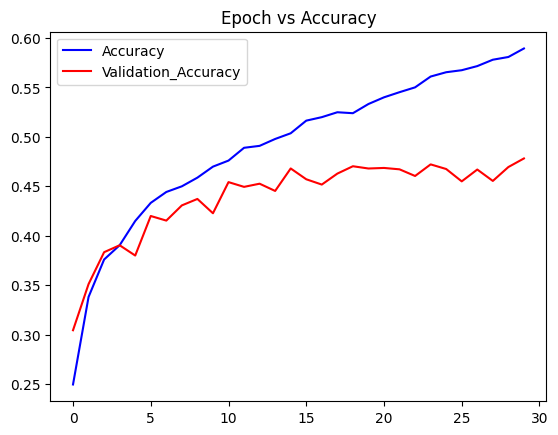

In [20]:
#Visualization
plt.plot(history.history['accuracy'], color = 'blue', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'Validation_Accuracy')
plt.legend()
plt.title("Epoch vs Accuracy")
plt.show()